In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cbe136da66dc461989fb771dc3f9946e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5v4Grj0PCaAjaU-hlGEuCuN_u3EL77Vll0vJ8GqV36Ag',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_cbe136da66dc461989fb771dc3f9946e.get_object(Bucket='opi-donotdelete-pr-31zvkcjimgz06s',Key='bops_bm.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_bm = pd.read_csv(body)

body = client_cbe136da66dc461989fb771dc3f9946e.get_object(Bucket='opi-donotdelete-pr-31zvkcjimgz06s',Key='bops_online.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_online = pd.read_csv(body)



In [4]:
df_online.head()

,id (DMA),year,month,week,after,close,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,2011,4,17,0,1,"18,564",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2011,4,18,0,1,"30,883",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2011,5,19,0,1,"37,425",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2011,5,20,0,1,"32,563",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2011,5,21,0,1,"35,773",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_online.columns

Index(['id (DMA)', 'year', 'month', 'week', 'after', 'close', ' sales ',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [6]:
df_online=df_online[['id (DMA)','year','month','week','after','close',' sales ']]
df_online.head()

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,"18,564"
1,1,2011,4,18,0,1,"30,883"
2,1,2011,5,19,0,1,"37,425"
3,1,2011,5,20,0,1,"32,563"
4,1,2011,5,21,0,1,"35,773"


In [7]:
df_bm.head()

,id (store),year,month,week,usa,after,sales,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691",NaN,NaN,NaN,NaN
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804",NaN,NaN,NaN,NaN
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104",NaN,NaN,NaN,NaN
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591",NaN,NaN,NaN,NaN
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884",NaN,NaN,NaN,NaN


In [8]:
df_bm.columns

Index(['id (store)', 'year', 'month', 'week', 'usa', 'after', ' sales ',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [9]:
df_bm=df_bm[['id (store)', 'year', 'month', 'week', 'usa', 'after', ' sales ']]
df_bm.head()

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691"
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804"
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104"
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591"
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884"


In [10]:
pd.DataFrame(df_bm.dtypes,columns=['Type']).T


,id (store),year,month,week,usa,after,sales
Type,float64,float64,float64,float64,float64,float64,object


## Missing Values

In [11]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [12]:
missing_data(df_bm)

,id (store),year,month,week,usa,after,sales
Total,2,2,2,2,2,2,2
Percent,0.0440723,0.0440723,0.0440723,0.0440723,0.0440723,0.0440723,0.0440723
Types,float64,float64,float64,float64,float64,float64,object


In [13]:
missing_data(df_online)

,id (DMA),year,month,week,after,close,sales
Total,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,int64,int64,object


In [14]:
df_bm.replace([np.inf, -np.inf], np.nan)
df_bm=df_bm.dropna()

In [15]:
df_bm[['id (store)', 'year', 'month', 'week', 'usa', 'after']]=df_bm[['id (store)', 'year', 'month', 'week', 'usa', 'after']].astype('int')

In [16]:
df_bm.head()

,id (store),year,month,week,usa,after,sales
0,1,2011,4,16,0,0,"118,691"
1,1,2011,4,17,0,0,"113,804"
2,1,2011,4,18,0,0,"172,104"
3,1,2011,5,19,0,0,"105,591"
4,1,2011,5,20,0,0,"94,884"


In [17]:
df_bm[' sales '] = df_bm[' sales '].str.replace(',', '').astype(float)

In [18]:
df_online[' sales '] = df_online[' sales '].str.replace(',', '').astype(float)

In [19]:
df_bm.head()

,id (store),year,month,week,usa,after,sales
0,1,2011,4,16,0,0,118691.0
1,1,2011,4,17,0,0,113804.0
2,1,2011,4,18,0,0,172104.0
3,1,2011,5,19,0,0,105591.0
4,1,2011,5,20,0,0,94884.0


In [20]:
df_online.head()

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564.0
1,1,2011,4,18,0,1,30883.0
2,1,2011,5,19,0,1,37425.0
3,1,2011,5,20,0,1,32563.0
4,1,2011,5,21,0,1,35773.0


In [21]:
df_online.describe()


,id (DMA),year,month,week,after,close,sales
count,10710.000000,10710.000000,10710.000000,10710.00000,10710.000000,10710.000000,10710.000000
mean,105.500000,2011.274510,6.450980,27.45098,0.490196,0.480952,13755.704855
std,60.623921,0.446288,3.533278,15.42074,0.499927,0.499660,22411.737794
min,1.000000,2011.000000,1.000000,1.00000,0.000000,0.000000,63.000000
25%,53.000000,2011.000000,3.000000,13.00000,0.000000,0.000000,1144.000000
50%,105.500000,2011.000000,7.000000,28.00000,0.000000,0.000000,5567.500000
75%,158.000000,2012.000000,10.000000,41.00000,1.000000,1.000000,17185.750000
max,210.000000,2012.000000,12.000000,53.00000,1.000000,1.000000,319233.000000


In [22]:
df_bm.describe()

,id (store),year,month,week,usa,after,sales
count,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000
mean,84.738095,2011.296296,6.314815,26.796296,0.797619,0.500000,63873.317019
std,49.434118,0.456674,3.479549,15.228823,0.401819,0.500055,36531.546280
min,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000,2915.000000
25%,42.500000,2011.000000,3.000000,14.000000,1.000000,0.000000,37465.500000
50%,84.000000,2011.000000,6.000000,26.500000,1.000000,0.500000,58165.000000
75%,127.500000,2012.000000,9.000000,40.000000,1.000000,1.000000,84089.750000
max,169.000000,2012.000000,12.000000,53.000000,1.000000,1.000000,286827.000000


In [23]:
df_bm['date'] = pd.to_datetime(df_bm.year.astype(str), format='%Y') + \
             pd.to_timedelta(df_bm.week.mul(7).astype(str) + ' days')
df_bm.head()

,id (store),year,month,week,usa,after,sales,date
0,1,2011,4,16,0,0,118691.0,2011-04-23
1,1,2011,4,17,0,0,113804.0,2011-04-30
2,1,2011,4,18,0,0,172104.0,2011-05-07
3,1,2011,5,19,0,0,105591.0,2011-05-14
4,1,2011,5,20,0,0,94884.0,2011-05-21


In [24]:
df_online['date'] = pd.to_datetime(df_online.year.astype(str), format='%Y') + \
             pd.to_timedelta(df_online.week.mul(7).astype(str) + ' days')
df_online.head()

,id (DMA),year,month,week,after,close,sales,date
0,1,2011,4,17,0,1,18564.0,2011-04-30
1,1,2011,4,18,0,1,30883.0,2011-05-07
2,1,2011,5,19,0,1,37425.0,2011-05-14
3,1,2011,5,20,0,1,32563.0,2011-05-21
4,1,2011,5,21,0,1,35773.0,2011-05-28


In [25]:
df_online


,id (DMA),year,month,week,after,close,sales,date
0,1,2011,4,17,0,1,18564.0,2011-04-30
1,1,2011,4,18,0,1,30883.0,2011-05-07
2,1,2011,5,19,0,1,37425.0,2011-05-14
3,1,2011,5,20,0,1,32563.0,2011-05-21
4,1,2011,5,21,0,1,35773.0,2011-05-28
...,...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,9357.0,2012-03-11
10706,210,2012,3,11,1,0,3013.0,2012-03-18
10707,210,2012,3,12,1,0,3155.0,2012-03-25
10708,210,2012,3,13,1,0,2925.0,2012-04-01


## Graficas ventas online

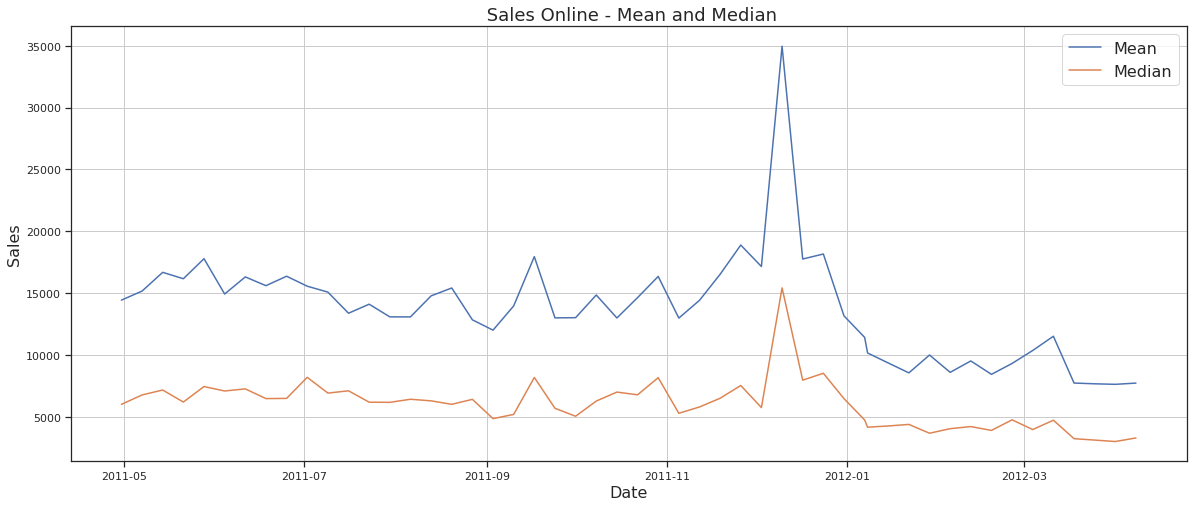

In [26]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sales_mean=df_online[' sales '].groupby(df_online['date']).mean()
sales_median=df_online[' sales '].groupby(df_online['date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title(' Sales Online - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [27]:
df_online1= df_online[df_online.after == 1]
df_online2= df_online[df_online.after != 1]
df_online2.head()

,id (DMA),year,month,week,after,close,sales,date
0,1,2011,4,17,0,1,18564.0,2011-04-30
1,1,2011,4,18,0,1,30883.0,2011-05-07
2,1,2011,5,19,0,1,37425.0,2011-05-14
3,1,2011,5,20,0,1,32563.0,2011-05-21
4,1,2011,5,21,0,1,35773.0,2011-05-28


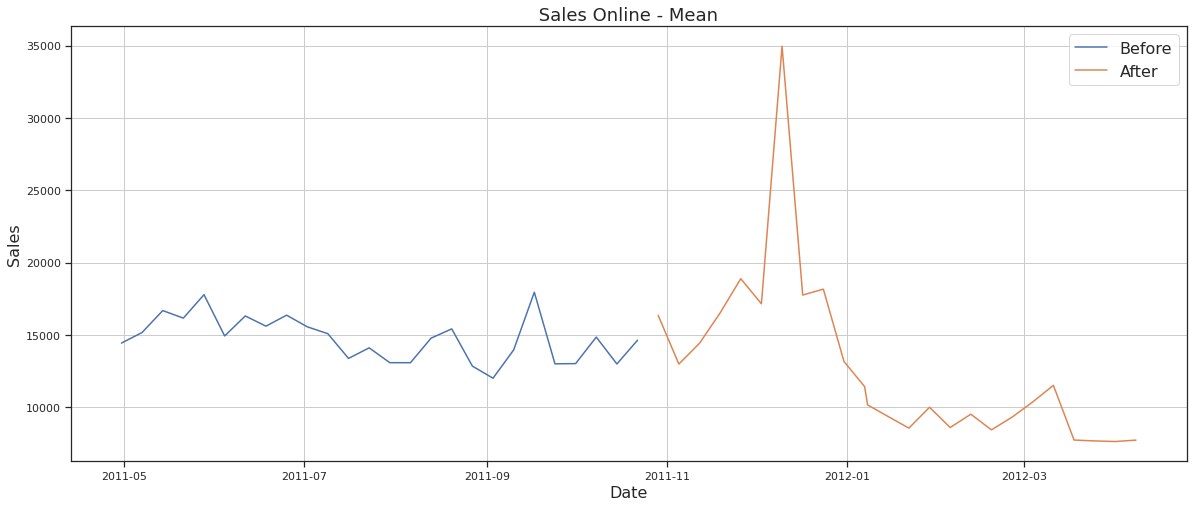

In [28]:
sales_mean=df_online2[' sales '].groupby(df_online2['date']).mean()
sales_median=df_online1[' sales '].groupby(df_online1['date']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Before', 'After'], loc='best', fontsize=16)
plt.title(' Sales Online - Mean ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

Se muestra una clara disminucion de ventas a partir de la implementacion de la estrategia BOPS. Sin embargo, aun faltan mas facotres a considerar como la DMA

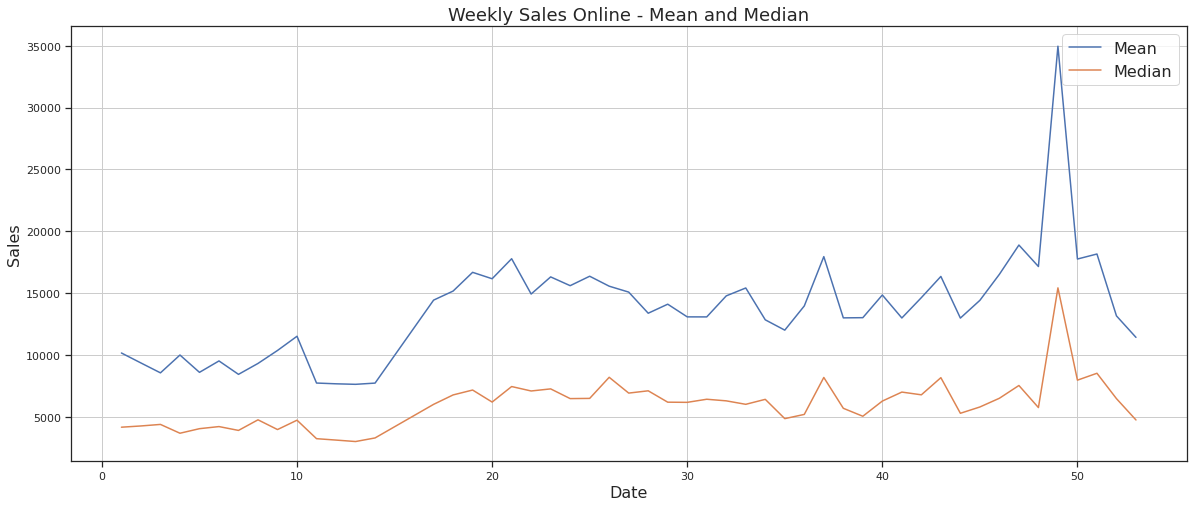

In [29]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sales_mean=df_online[' sales '].groupby(df_online['week']).mean()
sales_median=df_online[' sales '].groupby(df_online['week']).median()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales Online - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

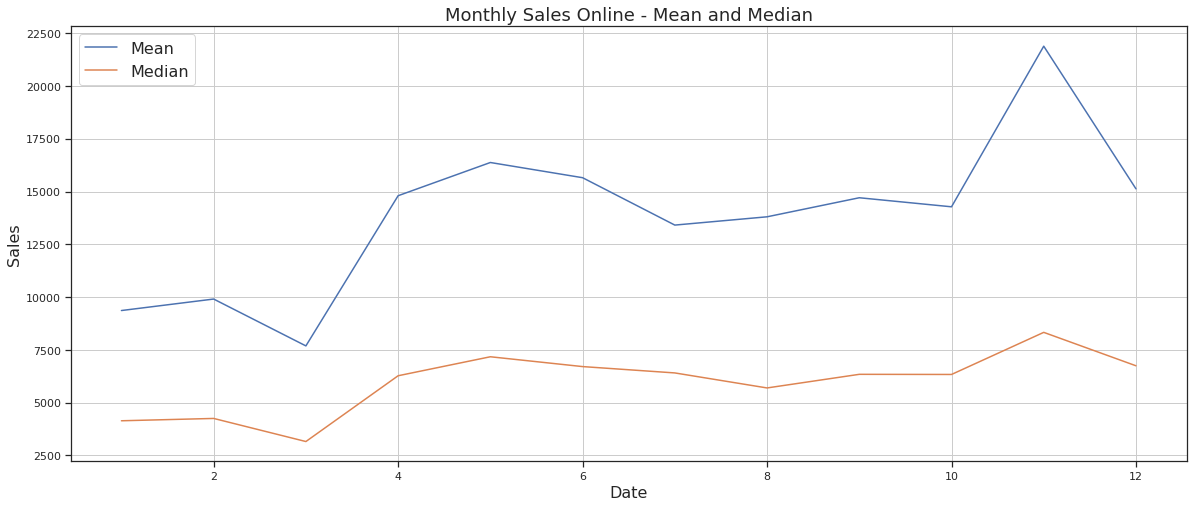

In [30]:

sales_mean=df_online[' sales '].groupby(df_online['month']).mean()
sales_median=df_online[' sales '].groupby(df_online['month']).median()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Monthly Sales Online - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

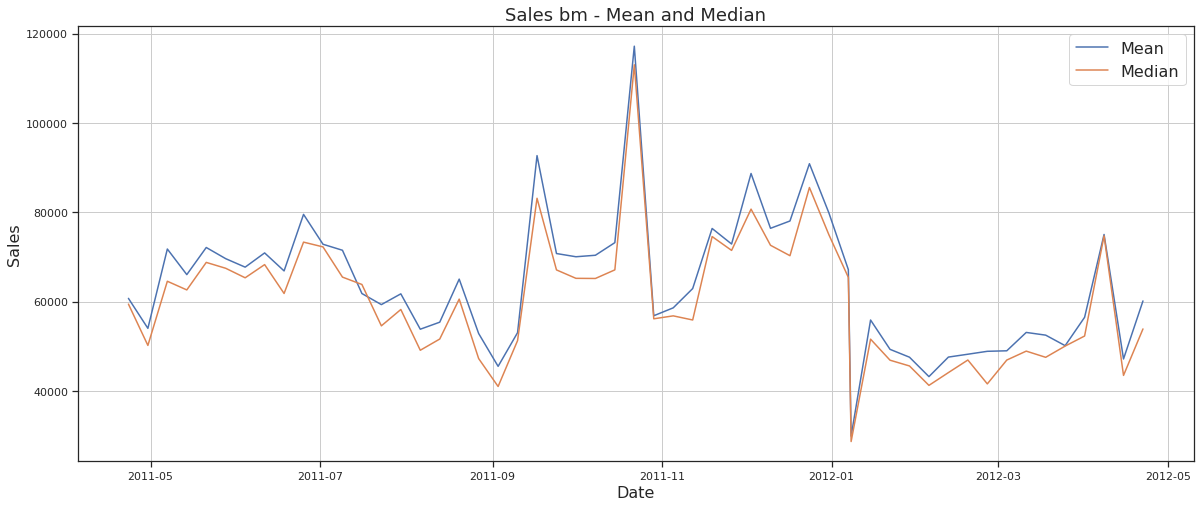

In [31]:
sales_mean=df_bm[' sales '].groupby(df_bm['date']).mean()
sales_median=df_bm[' sales '].groupby(df_bm['date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Sales bm - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [32]:
df_bm1= df_bm[df_bm.after == 1]
df_bm2= df_bm[df_bm.after != 1]
df_bm2.head()

,id (store),year,month,week,usa,after,sales,date
0,1,2011,4,16,0,0,118691.0,2011-04-23
1,1,2011,4,17,0,0,113804.0,2011-04-30
2,1,2011,4,18,0,0,172104.0,2011-05-07
3,1,2011,5,19,0,0,105591.0,2011-05-14
4,1,2011,5,20,0,0,94884.0,2011-05-21


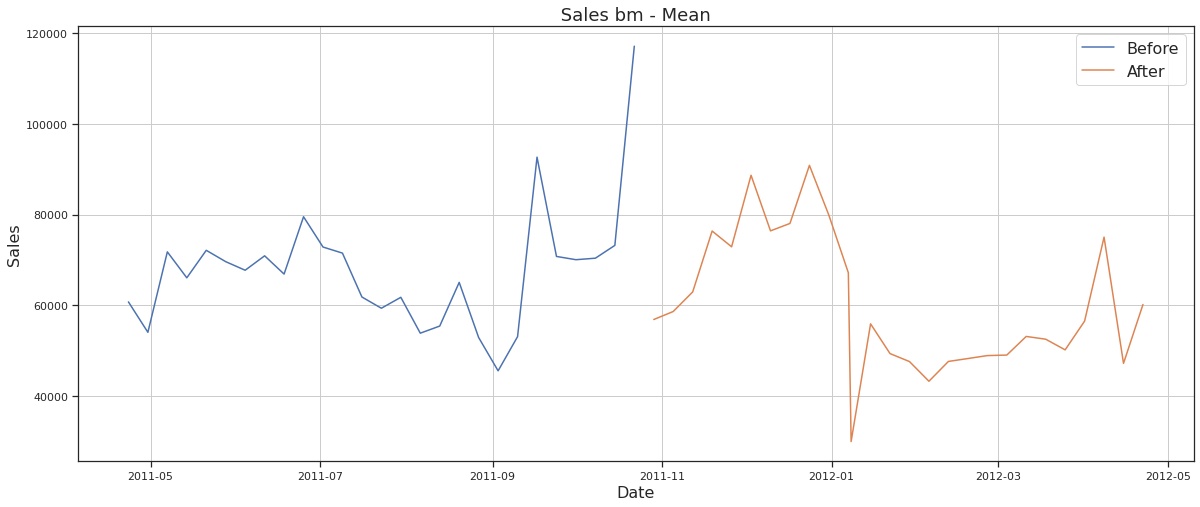

In [33]:
sales_mean=df_bm2[' sales '].groupby(df_bm2['date']).mean()
sales_median=df_bm1[' sales '].groupby(df_bm1['date']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Before', 'After'], loc='best', fontsize=16)
plt.title(' Sales bm - Mean ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

Aunque se muestra una disminición en las ventas a partir de la implementación de la estrategia, aun falta considerar la localización de las tiendas

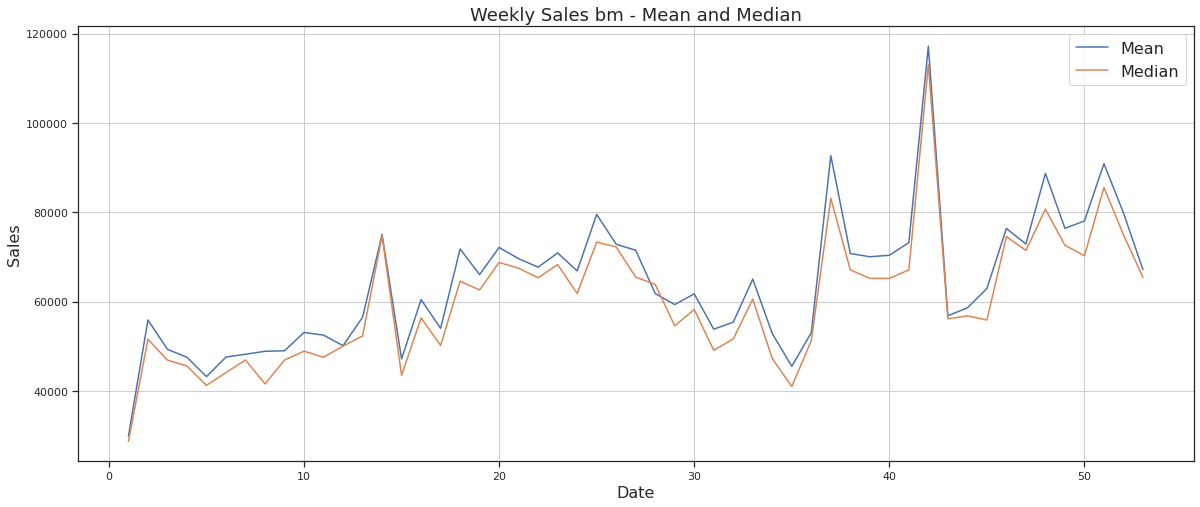

In [34]:

sales_mean=df_bm[' sales '].groupby(df_bm['week']).mean()
sales_median=df_bm[' sales '].groupby(df_bm['week']).median()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales bm - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

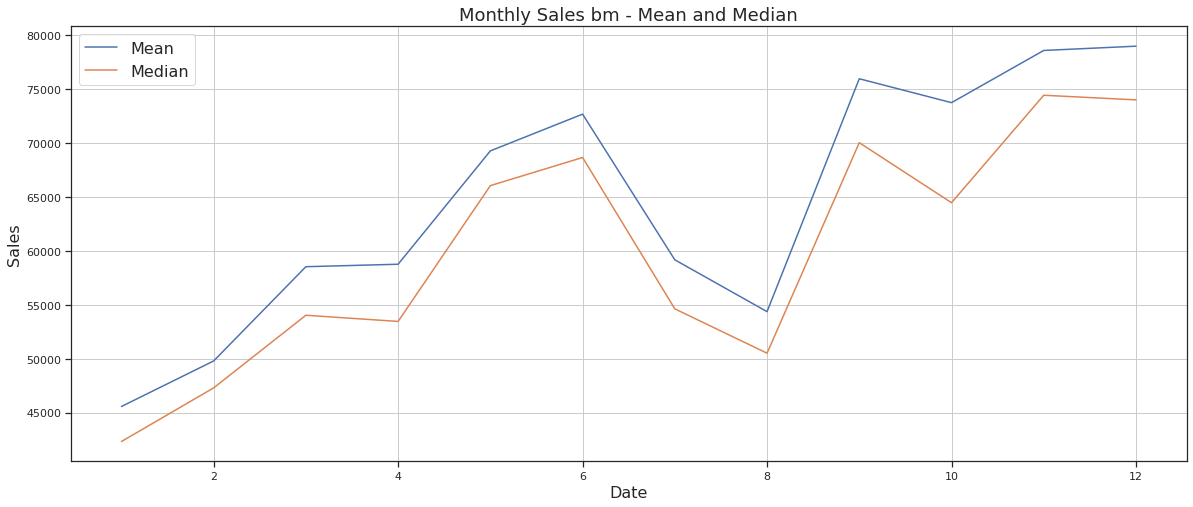

In [35]:

sales_mean=df_bm[' sales '].groupby(df_bm['month']).mean()
sales_median=df_bm[' sales '].groupby(df_bm['month']).median()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Monthly Sales bm - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

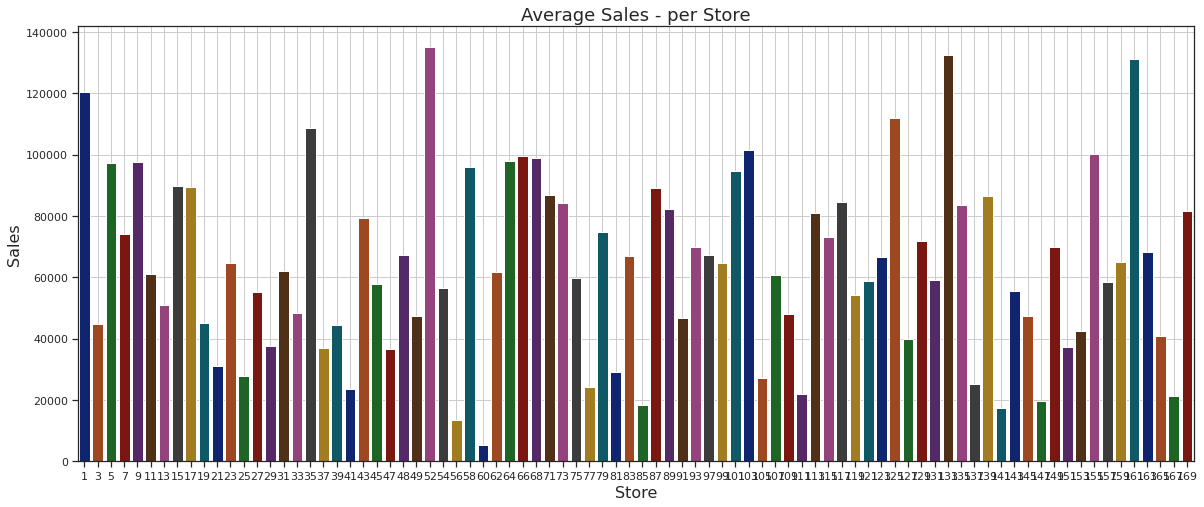

In [36]:
weekly_sales = df_bm[' sales '].groupby(df_bm['id (store)']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

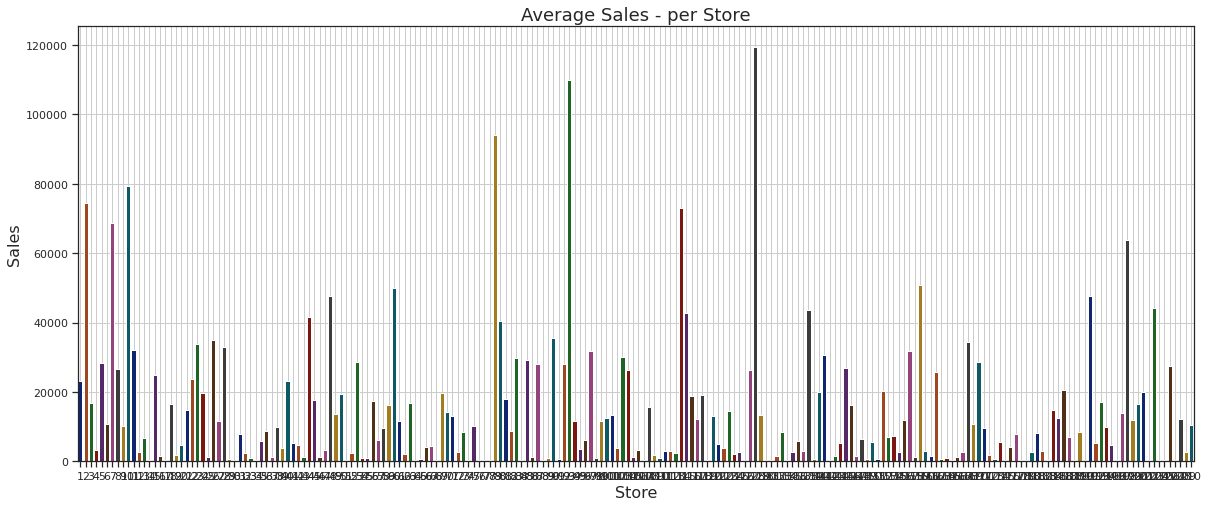

In [37]:
weekly_sales = df_online[' sales '].groupby(df_online['id (DMA)']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

## Analizarames los datos a partir de la variable close y la variable usa

Analizaremos las ventas para las compras realizadas cerca de la DMA y las lejanas por separado. Ademas se analiza las tiendas que se encuentran en Estados Unidos, debido a que solo en Estados Unidos se lanzo el proyecto BOPS

### DMA

In [38]:
df_onlineDMA1b= df_online2[df_online2.close == 1]
df_onlineDMA1a= df_online1[df_online1.close == 1]

df_onlineDMA2b= df_online2[df_online2.close != 1]
df_onlineDMA2a= df_online1[df_online1.close != 1]

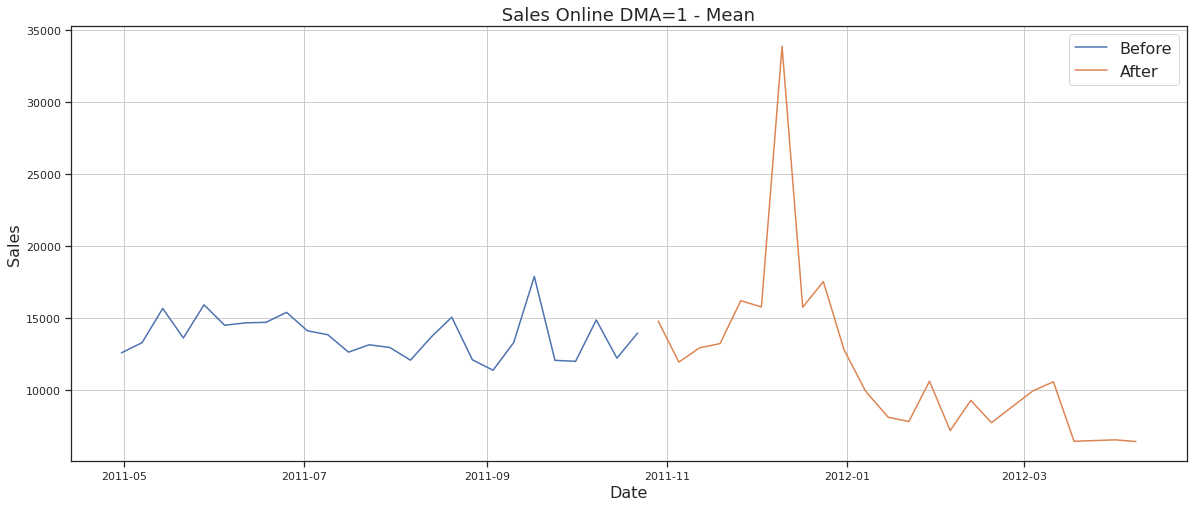

In [39]:
sales_mean=df_onlineDMA1b[' sales '].groupby(df_onlineDMA1b['date']).mean()
sales_median=df_onlineDMA1a[' sales '].groupby(df_onlineDMA1a['date']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Before', 'After'], loc='best', fontsize=16)
plt.title(' Sales Online DMA=1 - Mean ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

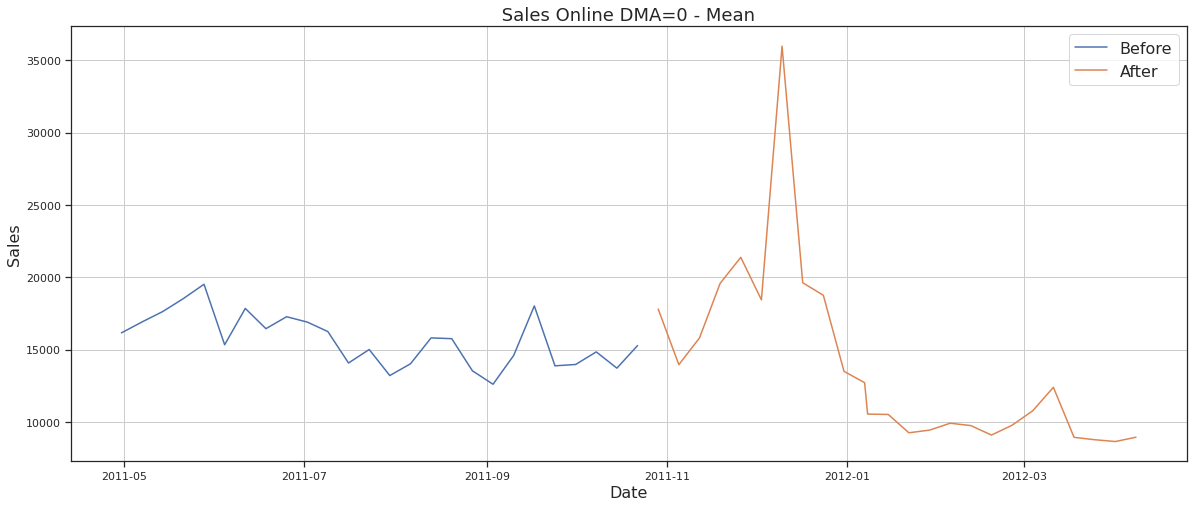

In [40]:
sales_mean=df_onlineDMA2b[' sales '].groupby(df_onlineDMA2b['date']).mean()
sales_median=df_onlineDMA2a[' sales '].groupby(df_onlineDMA2a['date']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Before', 'After'], loc='best', fontsize=16)
plt.title(' Sales Online DMA=0 - Mean ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

### Tiendas en Estados Unidos

In [41]:
df_bmDMA1b= df_bm2[df_bm2.usa == 1]
df_bmDMA1a= df_bm1[df_bm1.usa == 1]

df_bmDMA2b= df_bm2[df_bm2.usa != 1]
df_bmDMA2a= df_bm1[df_bm1.usa != 1]

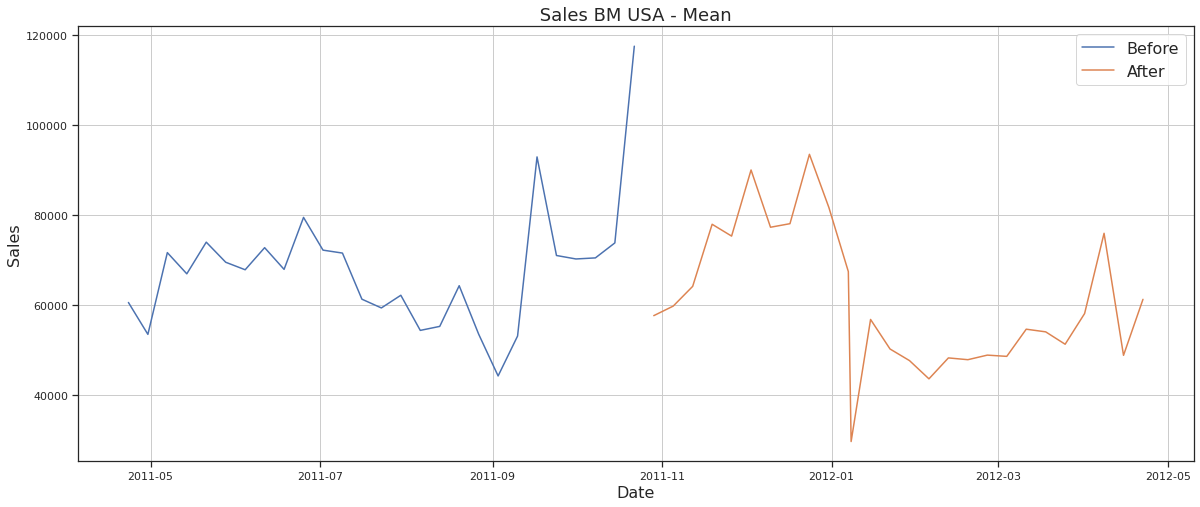

In [42]:
sales_mean=df_bmDMA1b[' sales '].groupby(df_bmDMA1b['date']).mean()
sales_median=df_bmDMA1a[' sales '].groupby(df_bmDMA1a['date']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Before', 'After'], loc='best', fontsize=16)
plt.title(' Sales BM USA - Mean ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

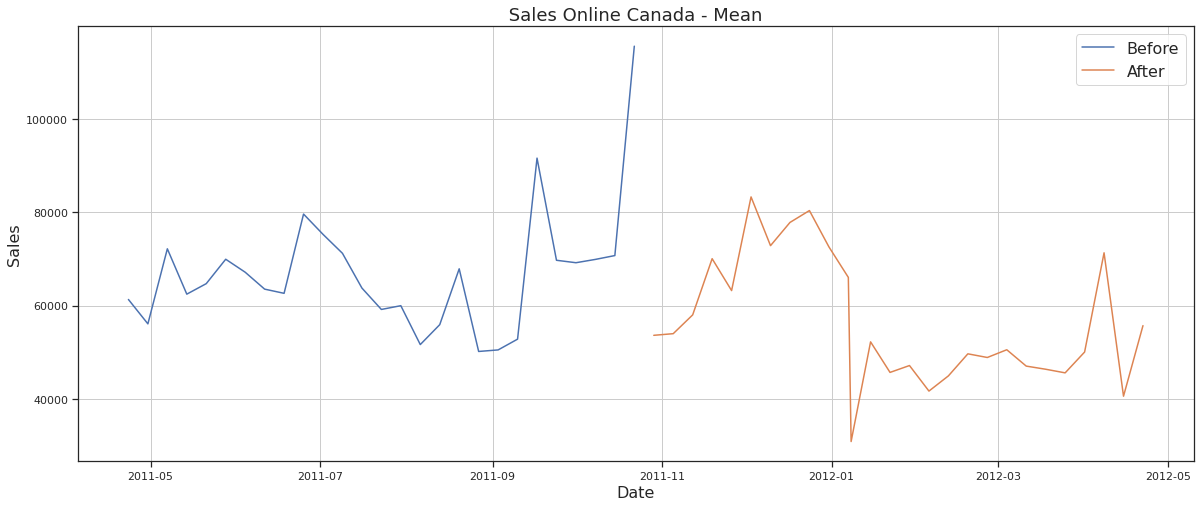

In [43]:
sales_mean=df_bmDMA2b[' sales '].groupby(df_bmDMA2b['date']).mean()
sales_median=df_bmDMA2a[' sales '].groupby(df_bmDMA2a['date']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)
sns.lineplot(sales_median.index, sales_median.values)
plt.grid()
plt.legend(['Before', 'After'], loc='best', fontsize=16)
plt.title(' Sales Online Canada - Mean ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [44]:
sales_mean_dbbUSA=df_bmDMA1b[' sales '].mean()
sales_mean_dbaUSA=df_bmDMA1a[' sales '].mean()
sales_mean_dbbC=df_bmDMA2b[' sales '].mean()
sales_mean_dbaC=df_bmDMA2a[' sales '].mean()

df_salesmdb=pd.DataFrame({'Tiendas':['USA antes','USA despues','Cananda antes','Canada Despues'],'Venta media':[sales_mean_dbbUSA,sales_mean_dbaUSA,sales_mean_dbbC,sales_mean_dbaC]})
df_salesmdb

,Tiendas,Venta media
0,USA antes,67844.496960
1,USA despues,61058.932559
2,Cananda antes,66862.259259
3,Canada Despues,56325.239651


In [48]:
sales_total_dbbUSA=df_bmDMA1b[' sales '].sum()
sales_total_dbaUSA=df_bmDMA1a[' sales '].sum()
sales_total_dbbC=df_bmDMA2b[' sales '].sum()
sales_total_dbaC=df_bmDMA2a[' sales '].sum()

df_salesmdb['Venta Total']= [sales_total_dbbUSA,sales_total_dbaUSA,sales_total_dbbC,sales_total_dbaC]
df_salesmdb

,Tiendas,Venta media,Venta Total
0,USA antes,67844.496960,122730695.0
1,USA despues,61058.932559,110455609.0
2,Cananda antes,66862.259259,30689777.0
3,Canada Despues,56325.239651,25853285.0


In [46]:
sales_mean_onb1=df_onlineDMA1b[' sales '].mean()
sales_mean_ona1=df_onlineDMA1a[' sales '].mean()
sales_mean_onb0=df_onlineDMA2b[' sales '].mean()
sales_mean_ona0=df_onlineDMA2a[' sales '].mean()

df_salesmon=pd.DataFrame({'Tiendas':['close antes','Close despues','Far antes','Far Despues'],'Venta media':[sales_mean_dbbUSA,sales_mean_dbaUSA,sales_mean_dbbC,sales_mean_dbaC]})
df_salesmon

,Tiendas,Venta media
0,close antes,67844.496960
1,Close despues,61058.932559
2,Far antes,66862.259259
3,Far Despues,56325.239651


In [53]:
sales_total_onb1=df_onlineDMA1b[' sales '].sum()
sales_total_ona1=df_onlineDMA1a[' sales '].sum()
sales_total_onb2=df_onlineDMA2b[' sales '].sum()
sales_total_ona2=df_onlineDMA2a[' sales '].sum()

df_salesmon['Venta Total']= [sales_total_dbbUSA,sales_total_dbaUSA,sales_total_dbbC,sales_total_dbaC]
df_salesmon

,Tiendas,Venta media,Venta Total
0,close antes,67844.496960,122730695.0
1,Close despues,61058.932559,110455609.0
2,Far antes,66862.259259,30689777.0
3,Far Despues,56325.239651,25853285.0


### 1. ¿Deberían expandirse a Canadá? 

Al analizar el promedio de ventas separando las tiendas por pais, se puede observar que la disminución en las ventas de las tiendas en Estados Unidos no es tan grande. No podemos decir que la causa de la disminución de las ventas es debido la implementacion de la nueva estrategia, existen otros factores, como la epoca del año, se sabe que los primeros meses del año son los de menor venta.

En cuanto al analisis de las ventas online, si se puede apreciar que han disminuido significativamente a partir de la implementación de la estrategia. Esto puede deberse a que, la gente prefiere recojer en la tienda y a la vez comprar productos ahi.

Por otra parte al analizar las graficas de las tiendas de Canada, se observa una disminución mayor de las ventas promedio a pesar de que en esta region no se implemento la nueva estrategia.Con esto podriamos nos podemos dar una de idea de que en la disminución de las ventas han intervenido diferentes factores a la implementación de la nueva estrategia.

Con el estudio realizado puedo concluir que la estrategia deberia expandirse a Canada debido a que no hay datos significativos que nos permitan demostrar que la baja de ventas fue causada solamente por la implementación de la estrategia. Ademas de que es muy pronto para que la estrategia sea calificada adecuadamente.



### 2. ¿Cuántos millones de dólares se ganaron o perdieron a partir delprograma?Explicatu                             razonamiento y metodología. 

Para analizar este punto, solo se deberian considerar las tiendas en Estados Unidos debido a que solo en ellas se aplico la nueva estrategia. Ademas de considerar las ventas online con un DMA que cuenten con una tienda cerca. Creo que estos dos casos son los mas impactados por la nueva estrategia.

Explicado lo anterior muestro la diferencia media de veentas, asi como la diferencia del total de ventas.

In [54]:
perdida= pd.DataFrame({'Casos':['Online DMA cerca','Tiendas USA'],'Venta Media Antes':[sales_mean_dbbUSA,sales_mean_onb1],'Venta media Despues':[sales_mean_dbaUSA,sales_mean_ona1],
                      'Diferencia venta media':[sales_mean_dbbUSA-sales_mean_dbaUSA,sales_mean_onb1-sales_mean_ona1],
                      'Venta total antes':[sales_total_dbbUSA,sales_total_onb1],'Venta total despues':[sales_total_dbaUSA,sales_total_ona1]})

In [56]:
perdida['Diferencia venta total']=[sales_total_dbbUSA-sales_total_dbaUSA,sales_total_onb1-sales_total_ona1]
perdida

,Casos,Venta Media Antes,Venta media Despues,Diferencia venta media,Venta total antes,Venta total despues,Diferencia venta total
0,Online DMA cerca,67844.496960,61058.932559,6785.564400,122730695.0,110455609.0,12275086.0
1,Tiendas USA,13743.557502,11615.459010,2128.098492,36090582.0,29329034.0,6761548.0
